# Use house data to predict other prices using linear regression in 3D!

## Import libraries and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

house_data = np.genfromtxt('./Datasets/area_br_price.txt', delimiter=',')
house_data[0]
# Data is grupued by house which is what we want i think, except for the price (Y_0)

array([  2.10400000e+03,   3.00000000e+00,   3.99900000e+05])

## Define features matrix **'X'** and expected values matrix **'Y'**
### We also prepend a 1 to every entry en X as dictated by linear regression heuristics

In [2]:
X = np.delete(house_data, 2, 1)
Y = np.delete(house_data, [0,1], 1)
# this will insert value 1 at positions 0 of X's axis 1
# very nice that np has this feature!
X = np.insert(X, 0, 1, axis=1)
X[0]

array([  1.00000000e+00,   2.10400000e+03,   3.00000000e+00])

## Normalize features matrix

In [3]:
np.shape(X)

(47, 3)

In [4]:
def normalizeFeatures (X):
    for i in range(1, np.shape(X)[1]):
        # isolate one of the features and normalize it
        feature = X.T[i]
        feature -= np.average(feature)
        feature /= (np.amax(feature) - np.amin(feature))
        
normalizeFeatures(X)
X[15]

array([ 1.        ,  0.08254803,  0.20744681])

## We now only need our hypothesis vector
### We will use this vector to get an estimate of the price of the house, we will have to tweak the vectors entries (3 in this case) so that the results match the prices given by house_data ('Y')
> In order to develop intuition about this function, we can think about θ0 as the basic price of a house, θ1 as the price per square meter, θ2 as the price per floor, etc. x1 will be the number of square meters in the house, x2 the number of floors, etc.

In [5]:
# thetaV is a vector with the dimensions of the number of parameters + 1
# X is the features matrix (columns with 1, size, room nb)
# Y is the vector holding the real values (price)
def costFunction (thetaV, X, Y):
    #Yt is the vector with the values that i think are correct
    dataPints = np.shape(Y)[0]
    Yt = np.dot(X, thetaV)
    Yt = Yt.reshape(dataPints, 1) #change shape so it will match Y as a column (T would not work)
    dif = Yt - Y
    sq = np.sqrt(np.square(dif))
    sm = np.sum(sq)
    avg = sm / dataPints
    cost = avg
    return cost # more or less represents how far away we are in avg to the real value

costFunction(np.array([400000,500000,10000]), X, Y)
# $70_000 is not that bad

72969.844870942412

## Try to visualize the cost function as a function of th1, the size of the house

In [6]:
maxi = 1000000
numSteps = 20 # <<<< Change that parameter
step = maxi/numSteps
iterations = int(maxi/step)

y = np.empty(iterations, dtype=np.float)
x = np.arange(1, maxi, step)

for i in range(iterations):
    y[i] = costFunction(np.array([400000,i*step,-5000]), X, Y)

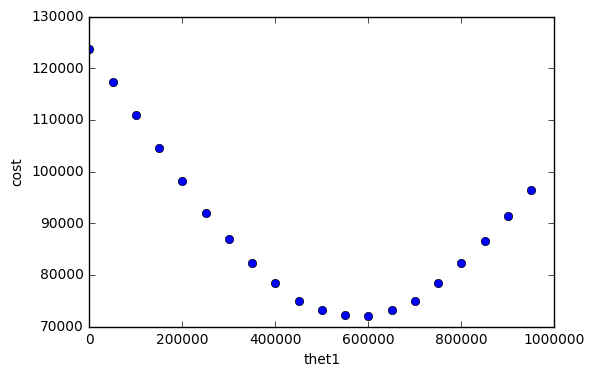

In [7]:
plt.plot(x, y, 'bo')
plt.xlabel('thet1')
plt.ylabel('cost')
plt.show()

## Try to visualize the cost function as a function of th2, the number of bedrooms

In [8]:
maxi = 100000
mini = -maxi
step = 10000
iterations = int((maxi - mini)/step)

y = np.empty(iterations, dtype=np.float)
x = np.arange(mini, maxi, step)

for i in range(iterations):
    y[i] = costFunction(np.array([400000,600000,mini + step*i]), X, Y)

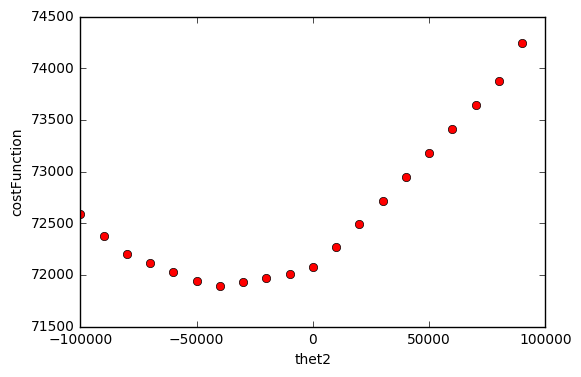

In [9]:
plt.plot(x, y, 'ro')
plt.xlabel('thet2')
plt.ylabel('costFunction')
plt.show()

## Try to visualize the cost function as a function of th0, the indep parameter

In [10]:
maxi = 500000
numSteps = 20 # <<<< Change that parameter
step = maxi/numSteps
iterations = int(maxi/step)

y = np.empty(iterations, dtype=np.float)
x = np.arange(1, maxi, step)

for i in range(iterations):
    y[i] = costFunction(np.array([i*step,600000,-5000]), X, Y)

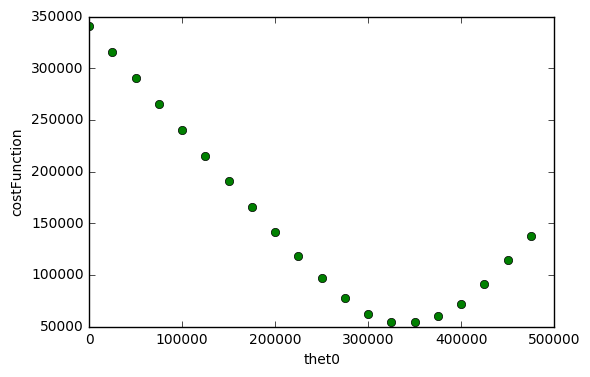

In [11]:
plt.plot(x, y, 'go')
plt.xlabel('thet0')
plt.ylabel('costFunction')
plt.show()

# The best parameters seem to be the following
- Th0 = 350000 (indep)
- Th1 = 600000 (size)
- Th2 = -50000 (rooms)

# Use this parameters to check what the prices actually are and compare them to the actual prices !

In [12]:
def getPrices (thetaV, X):
    #Yt is the vector with the values that i think are correct
    dataPints = np.shape(X)[0]
    Yt = np.dot(X, thetaV)
    Yt = Yt.reshape(dataPints, 1) #change shape so it will match Y as a column (T would not work)
    return Yt

In [13]:
hypParameters = np.array([350000,600000,-50000])
prices = getPrices (hypParameters, X)

from prettytable import PrettyTable
t = PrettyTable(['Expected', 'Real'])


for i in range(np.shape(prices)[0]):
    t.add_row([int(prices[i][0]), int(Y[i][0])])
    
print(t.get_string(start = 0, end = 5))

+----------+--------+
| Expected |  Real  |
+----------+--------+
|  369224  | 399900 |
|  285826  | 329900 |
|  418203  | 369000 |
|  267879  | 232000 |
|  504986  | 539900 |
+----------+--------+
